<h1> K-Nearest Neighbors</h1>

<p>In this notebook we give an example of the k-Nearest Neighbors algorithm application using the (well known) iris dataset.</p>
<p>First of all we need to import the dataset from scikit library called ``sklearn`` and a couple of other useful libraries (namely ``numpy`` and ``matplotlib``) :</p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# The following line allows to include figures in the notebook
%matplotlib inline
# otherwise to have interactive figures in the notebook
#%matplotlib nbagg

# Importing the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

<p>Then we also need to import the algorithm itself :</p>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

<p>In the latter cell we imported the algorithm and will first use it "_out of the box_", i.e. without forcing any parameter.
We will see later what is the effect of some of these parameters.<br>
For easy visualization we focus hereafter on the first and third column/feature of the dataset only.</p>

In [6]:
# selecting the first and third columns... in a fancy way
X = iris.data[:,0:3:2]
y = iris['target']

<p>Now applying the algorithm to the data</p>

In [7]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

<p>When you train any algorithm (using ``.fit()``) on data and associated labels scikit automatically returns the name of the algorithm and the values for each of its parameters.
This is very useful to check that this is indeed what you wanted to do.<br>
As you can see the k-Nearest Neighbors implementation comes with several parameters such as the number of neighbors to consider for the classification, the type of metric we want to use and the weight we apply to nearest neighbors when classifying any new elements.</p>
Once trained, we can next give a new element(s) to the algorithm and it will give us the estimated class of that same element(s) :</p>

In [17]:
# for a single element
knn.predict([[6.0,4.0]])

array([1])

In [18]:
# for more than one element
knn.predict([[6.0,4.0],[6.5,6.0],[5.5,2.0]])

array([1, 2, 0])

<p>If we want to visualize a bit better what would the output class of any new element why can use the following trick :
ask the predicted class for points taken on a grid covering our features space.</p>

In [19]:
# creates the grid
xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,10.0,301))

# ask for the prediction at each point of the grid
predict = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))

<p>Now visualizing the result</p>

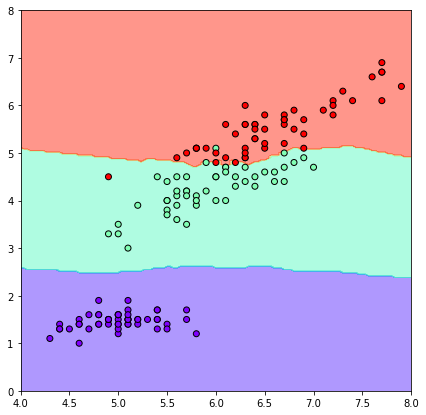

In [50]:
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')
ax.scatter(X.T[0], X.T[1], c=iris['target'],
           cmap='rainbow', edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0);

<p>As mentioned previously the k-Nearest Neighbors accepts several different parameters that affect the output.<br>Using the informations at this addresse :<br>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
<br>
try different values for the different parameters</p>

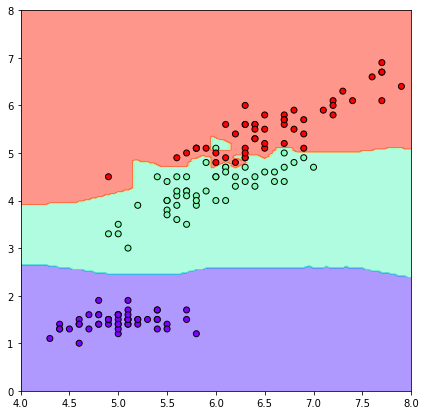

In [53]:
# Try with different columns or parameters, etc.

# ... For instance with a different number of neighbors :
knn = KNeighborsClassifier(n_neighbors=1)
# training...
knn.fit(X,y)

# predicting...
predict = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))

# visualizing...
fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')
ax.scatter(X.T[0], X.T[1], c=iris['target'],
           cmap='rainbow', edgecolors='k')
ax.set_xlim(4.0,8.0)
ax.set_ylim(0.0,8.0);

In [54]:
# Have Fun...

